<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Eq_do_Contraste_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos resolver numericamente a equação do contraste, dada como a equação (2) do artigo de Linder e Cahn.

In [1]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [2]:
# Parâmetros:
H0 = 67.4
O_m0 = 0.315

In [3]:
# Modelo LCDM:
def Densidade(t, y):    # t é o fator de escala e y é o delta (contraste)
    D_RG  = y[0]     # contraste
    dD_RG = y[1]    # primeira derivada do contraste

    O_m = O_m0*t**(-3)  
    O_L = 1 - O_m0

    H_RG = H0*np.sqrt(O_m + O_L)    # H(z)
    dH_RG = - (H_RG/t) - 0.5*(H0/t)*(H0/H_RG)*(O_m - 2*O_L)        # derivada do H(z)

# funções definidas somente para facilitar a escrita da derivada segunda do contraste
    faux1 = 3*H0**2
    faux2 = 2*(t**2)*(H_RG**2)

    ddD_RG = - ((3/t) + (dH_RG/H_RG))*dD_RG + (faux1/faux2)*O_m*D_RG   #  eq. da derivada segunda do contraste
    return [dD_RG, ddD_RG]

In [4]:
# Espaço de integração:
t_span = [0.2, 1]   # intervalo de integração do fator de escala
t = np.linspace(0.2, 1, 1000)

# Condições iniciais:
y0 = [0.2, 1] 

In [5]:
# Solução:
sol = solve_ivp(Densidade, t_span, y0, t_eval=t, method='LSODA') # função que quero resolver, o intervalo de integração, as condições iniciais, o linspace e o método
D_RG = sol.y[0]
dD_RG = sol.y[1]

In [6]:
# definindo o redshift
z = 1/sol.t - 1

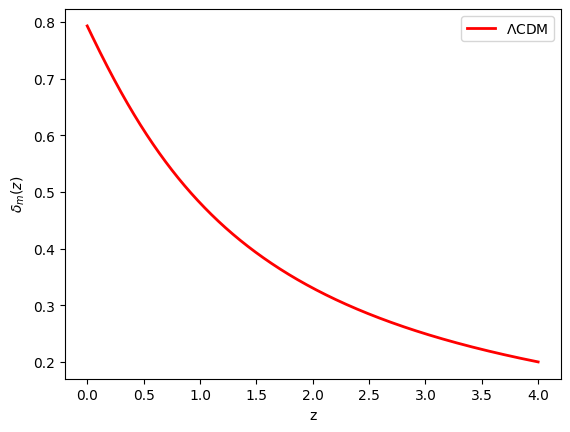

In [7]:
# plotando o contraste x z
#plt.figure(figsize=(10, 8))
plt.plot(z, D_RG, color='red', linewidth = 2, label='$\Lambda$CDM')
plt.legend()
plt.xlabel('z')
plt.ylabel('$\delta_m(z)$')
plt.savefig('delta(z).png', dpi=520, format='png', bbox_inches='tight')
plt.show()

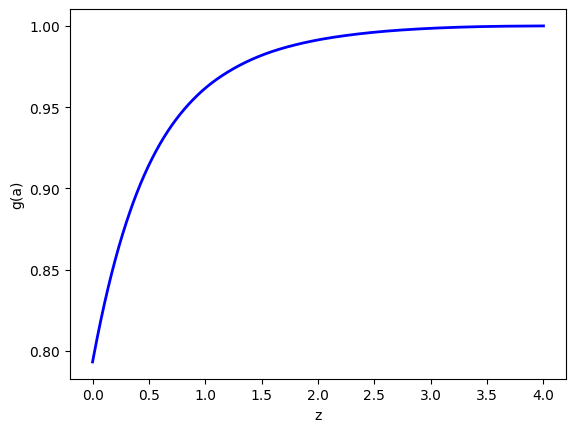

In [8]:
# vamos plotar a função g = delta/a (aparece no artigo de Linder e Cahn)
g_norm = D_RG/((sol.t))

#plt.figure(figsize=(10, 8))
plt.plot(z, g_norm, color='blue', linewidth = 2)
#plt.plot(z, D_RG, color='red', linewidth = 2, label='$\Lambda$CDM')
#plt.legend()
plt.xlabel('z')
plt.ylabel('g(a)')
#plt.savefig('delta(z).png', dpi=520, format='png', bbox_inches='tight')
plt.show()

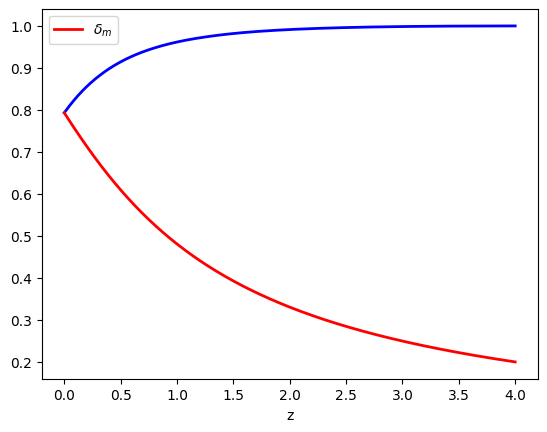

In [15]:
plt.plot(z, g_norm, color='blue', linewidth = 2)
plt.plot(z, D_RG, color='red', linewidth = 2, label='$\delta_m$')
plt.legend()
plt.xlabel('z')
plt.show()

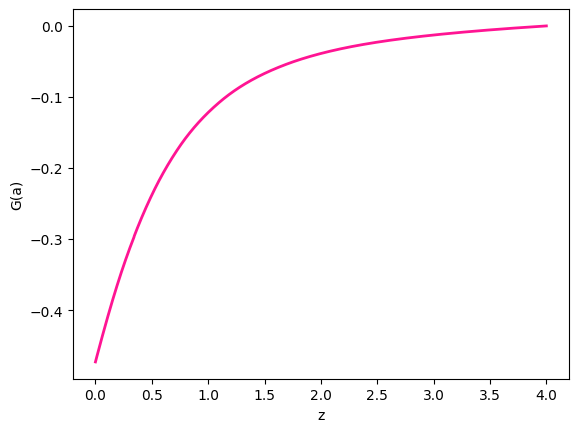

In [13]:
# vamos plotar a função G = dln(delta/a)/dln(a)

G = ((sol.t)*dD_RG)/D_RG - 1

#plt.figure(figsize=(10, 8))
plt.plot(z, G, color='deeppink', linewidth = 2)
plt.xlabel('z')
plt.ylabel('G(a)')
plt.show()

Agora, vamos comparar $g(a)$ com $G(a)$ em um plot. Segundo Linder e Cahn, $g(a)$ concorda com a solução exata $G(a)$ em aproximadamente 0.2%.

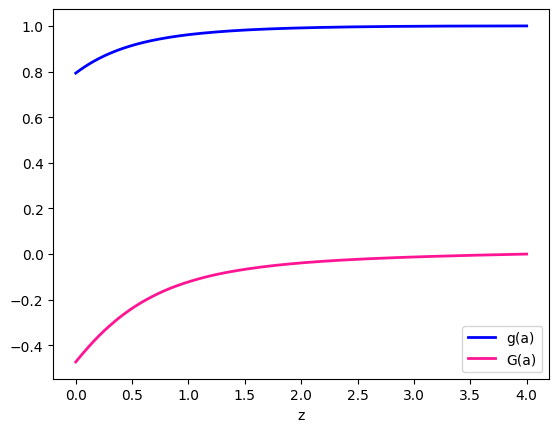

In [14]:
#plt.figure(figsize=(10, 8))
plt.plot(z, g_norm, color='blue', linewidth = 2, label='g(a)')
plt.plot(z, G, color='deeppink', linewidth = 2, label='G(a)')
plt.xlabel('z')
plt.legend()
plt.show()